In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

In [4]:
df = pd.read_csv("data/heart_2022_with_nans.csv")

df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
print(df.shape)
print(df.columns)

df.info()

(445132, 40)
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
--- 

In [191]:
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,436824,444039,433772,442067,440727,443575,443359,...,389086,431075,436053,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,350944,337559,233455,416959,414176,424336,376665,...,223221,320421,47099,210891,249919,209256,215604,121493,377324,270055


In [6]:
df = df.drop(['RemovedTeeth', 'DeafOrHardOfHearing', 'HadSkinCancer', 'LastCheckupTime',  'HadKidneyDisease', 'DifficultyWalking', 'HadArthritis', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear'], axis=1)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes


In [193]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadDiabetes', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [7]:
df = df.dropna(how='any')

In [20]:
female_df = df[df['Sex'] == 'Female']
male_df = df[df['Sex'] == 'Male']
df.loc[:,'HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df.loc[:,'HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df.loc[:,'HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


df.loc[:,'SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']


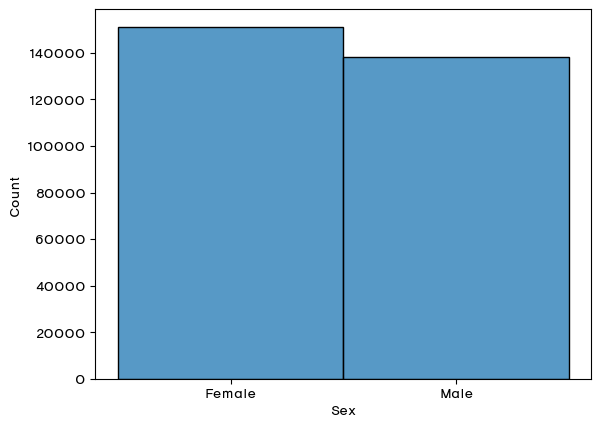

In [196]:
sns.histplot(
    df['Sex']
)

plt.show()

In [10]:
corr_mat = df.corr(
    numeric_only=True
)

corr_mat

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease_num
PhysicalHealthDays,1.000000,0.311973,-0.056473,-0.050922,0.075736,0.115750,0.166043
MentalHealthDays,0.311973,1.000000,-0.129970,-0.054987,0.042185,0.081283,0.028754
SleepHours,-0.056473,-0.129970,1.000000,-0.011312,-0.054115,-0.054282,0.010452
HeightInMeters,-0.050922,-0.054987,-0.011312,1.000000,0.473567,-0.026827,0.018890
WeightInKilograms,0.075736,0.042185,-0.054115,0.473567,1.000000,0.859379,0.047981
BMI,0.115750,0.081283,-0.054282,-0.026827,0.859379,1.000000,0.043358
HeartDisease_num,0.166043,0.028754,0.010452,0.018890,0.047981,0.043358,1.000000


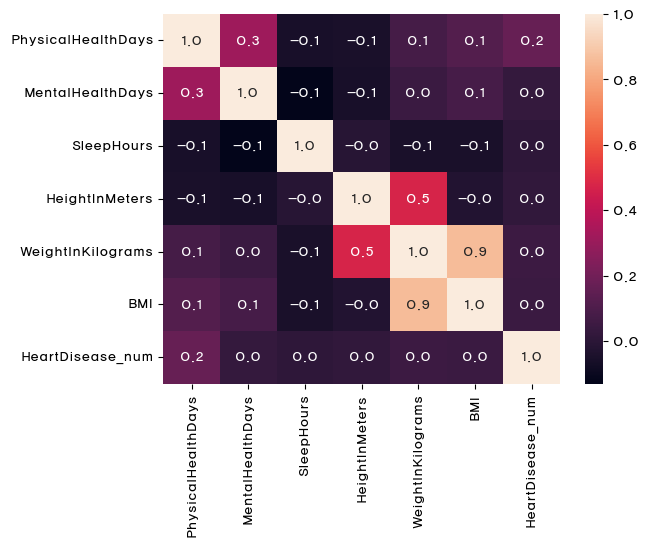

In [11]:
sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.1f'
)

plt.show()

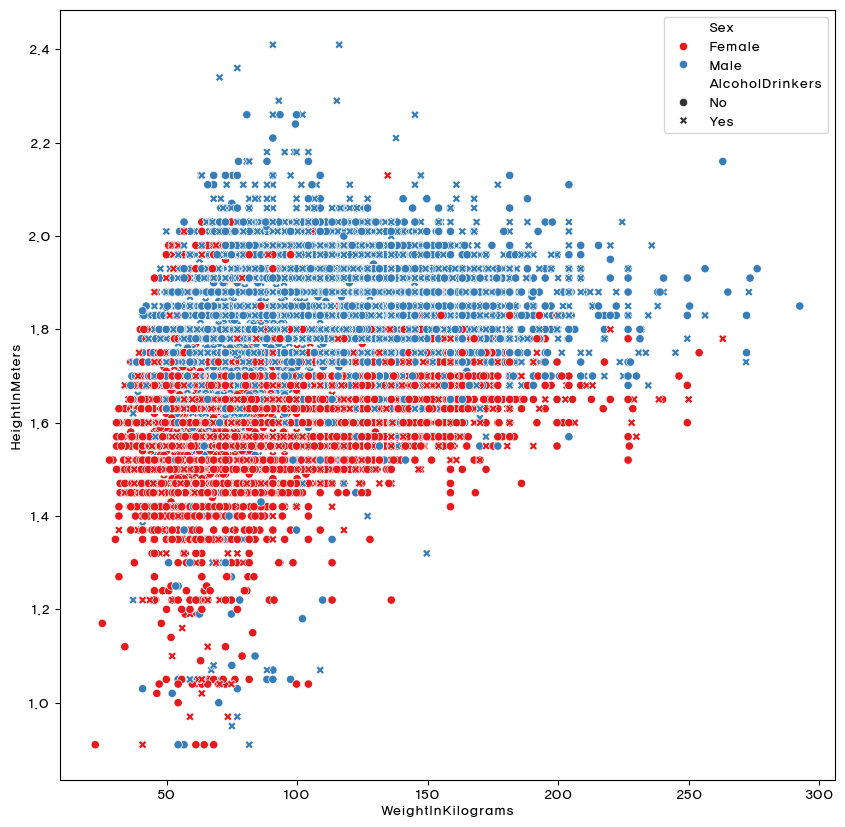

In [199]:
plt.figure(
    figsize=(10,10), # 캔버스 크기 (가로 8 세로 6) 단위 : 인치
)

sns.scatterplot(
    data=df,
    x='WeightInKilograms',
    y='HeightInMeters',
    hue='Sex',
    palette='Set1',
    style='AlcoholDrinkers', 
)

plt.show()

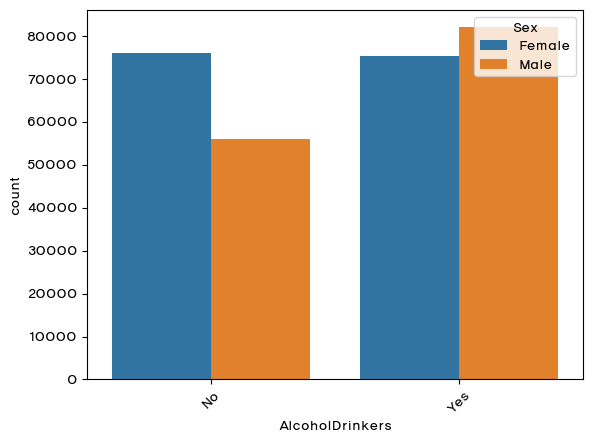

In [200]:
# countplot() : 데이터 개수를 bar로 시각화 하는 그래프

# palette : 막대 색상을 지정하는 색상 팔레트
# hue : 막대를 Pclass 값별로 색상 구분

sns.countplot(
    data=df,
    x='AlcoholDrinkers',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

plt.show()

([0, 1, 2, 3],
 [Text(0, 0, '비흡연'),
  Text(1, 0, '과거흡연'),
  Text(2, 0, '가끔흡연'),
  Text(3, 0, '매일흡연')])

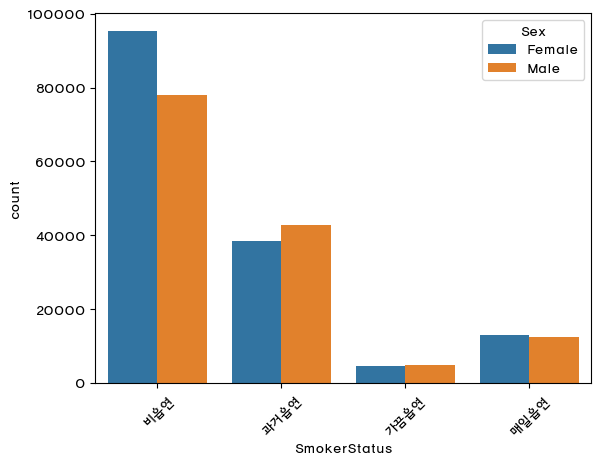

In [201]:
sns.countplot(
    data=df,
    x='SmokerStatus',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Never used e-cigarettes in my entire life'),
  Text(1, 0, 'Not at all (right now)'),
  Text(2, 0, 'Use them every day'),
  Text(3, 0, 'Use them some days')])

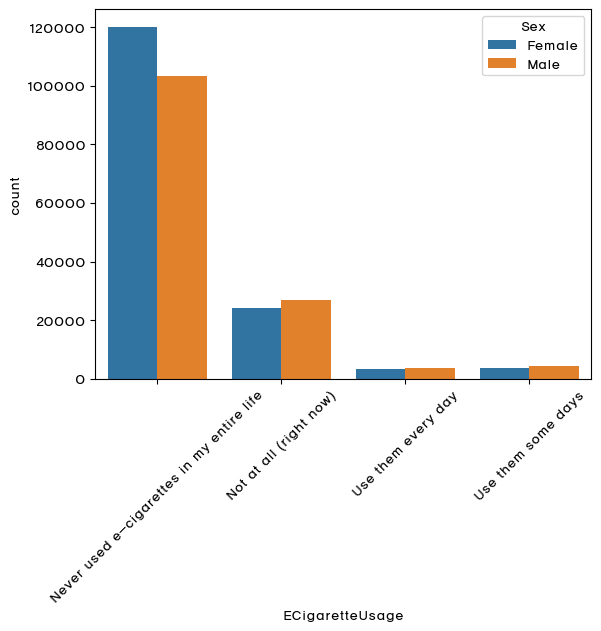

In [202]:
sns.countplot(
    data=df,
    x='ECigaretteUsage',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but only during pregnancy (female)')])

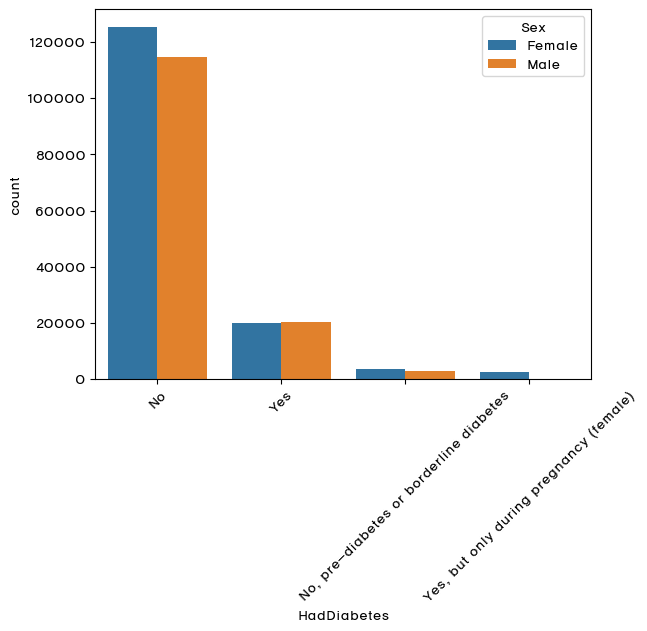

In [203]:
sns.countplot(
    data=df,
    x='HadDiabetes',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Age 18 to 24'),
  Text(1, 0, 'Age 25 to 29'),
  Text(2, 0, 'Age 30 to 34'),
  Text(3, 0, 'Age 35 to 39'),
  Text(4, 0, 'Age 40 to 44'),
  Text(5, 0, 'Age 45 to 49'),
  Text(6, 0, 'Age 50 to 54'),
  Text(7, 0, 'Age 55 to 59'),
  Text(8, 0, 'Age 60 to 64'),
  Text(9, 0, 'Age 65 to 69'),
  Text(10, 0, 'Age 70 to 74'),
  Text(11, 0, 'Age 75 to 79'),
  Text(12, 0, 'Age 80 or older')])

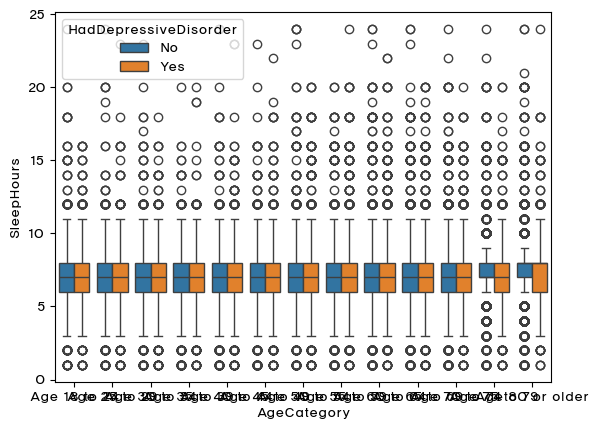

In [204]:
sns.boxplot(
    data=df,
    x='AgeCategory',
    y='SleepHours',
    hue='HadDepressiveDisorder',
    order=order
)
plt.xticks()

Text(0.5, 1.0, '우울증 있는 사람들의 음주 여부')

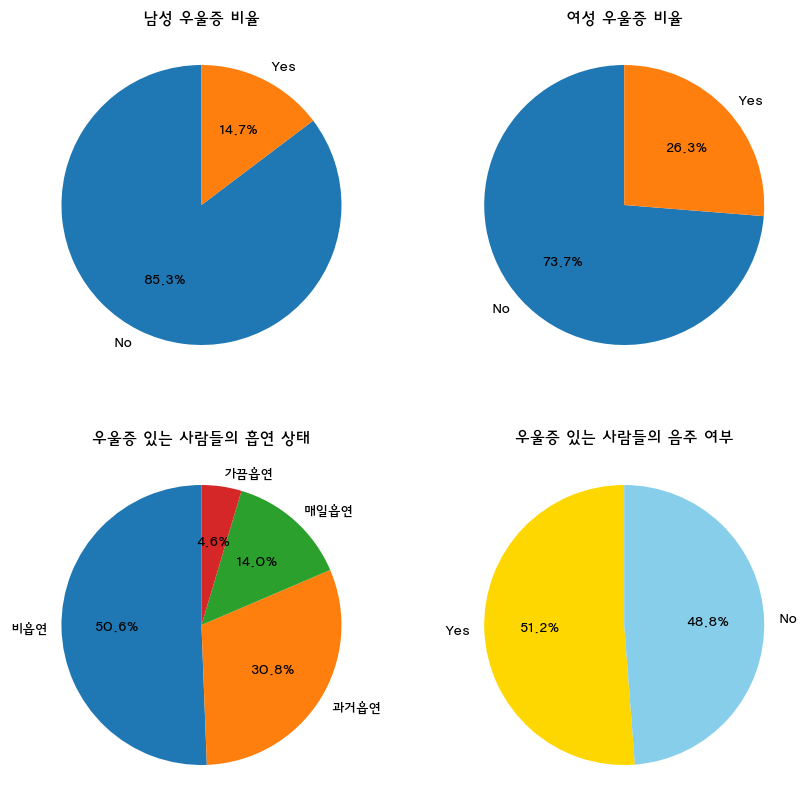

In [205]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

sleep_male = male_df['HadDepressiveDisorder'].value_counts(normalize=True)
ax[0,0].pie(
    sleep_male,
    labels=sleep_male.index,
    autopct='%1.1f%%',
    startangle=90,

)

ax[0,0].set_title('남성 우울증 비율')


sleep_female = female_df['HadDepressiveDisorder'].value_counts(normalize=True)
ax[0,1].pie(
    sleep_female,
    labels=sleep_female.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,1].set_title('여성 우울증 비율')

depressed_df = df[df['HadDepressiveDisorder'] == 'Yes']

smoke = depressed_df['SmokerStatus'].value_counts(normalize=True)
ax[1,0].pie(
    smoke,
    labels=smoke.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[1,0].set_title('우울증 있는 사람들의 흡연 상태')


alcohol = depressed_df['AlcoholDrinkers'].value_counts(normalize=True)
ax[1,1].pie(
    alcohol,
    labels=alcohol.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'skyblue']
)
ax[1,1].set_title('우울증 있는 사람들의 음주 여부')


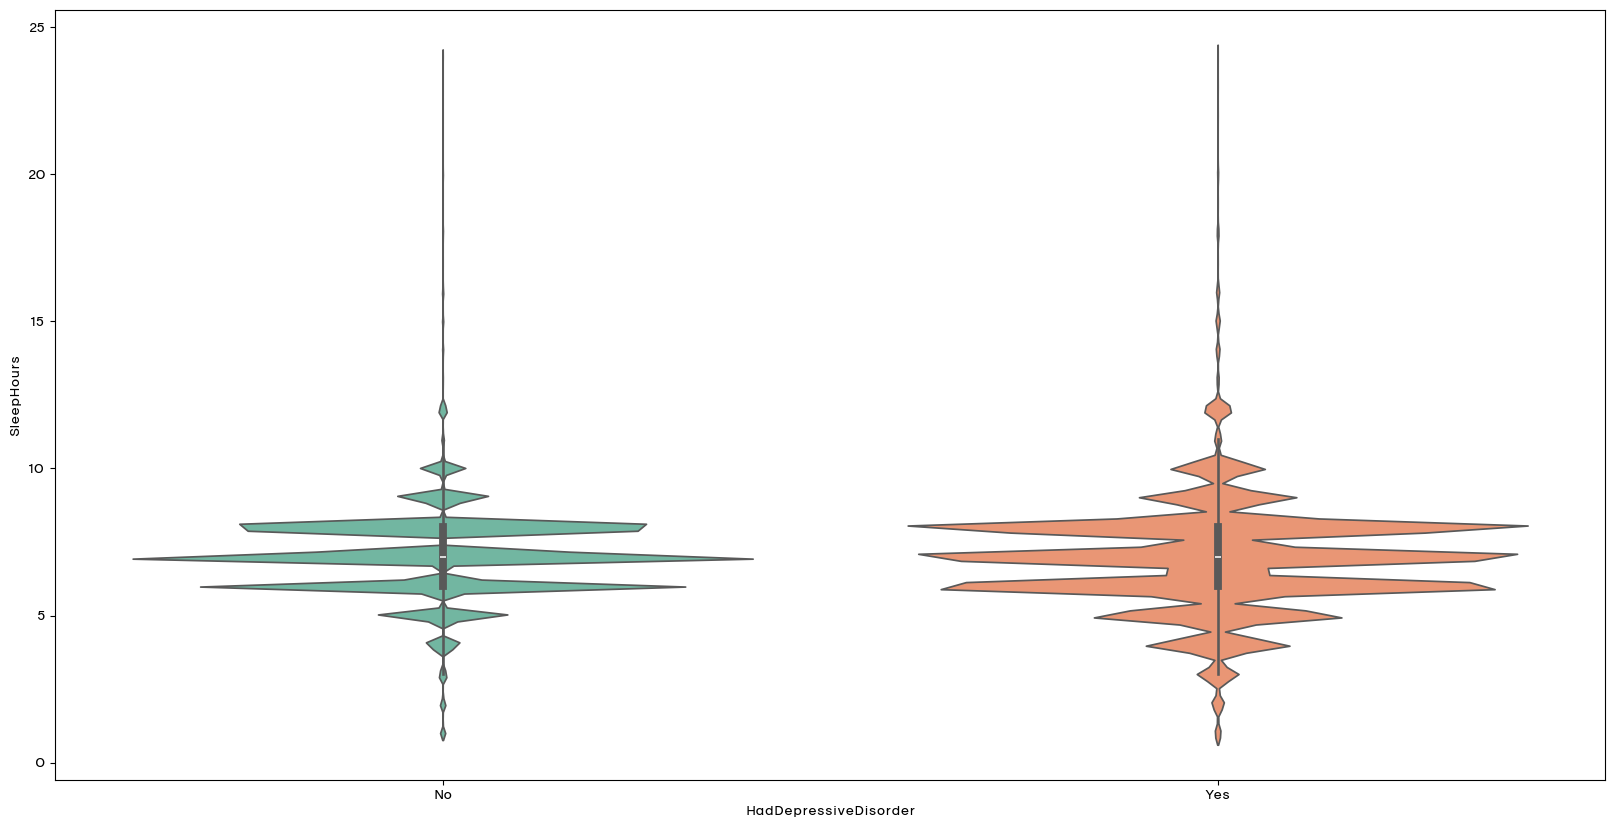

In [206]:
plt.figure(figsize=(20,10))

# sleep = depressed_df['SleepHours'].value_counts(normalize=True)
# plt.pie(
#     sleep,
#     labels=sleep.index,
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=['gold', 'skyblue']
# )


sns.violinplot(
    data=df,
    x='HadDepressiveDisorder',
    y='SleepHours',
    hue='HadDepressiveDisorder',
    palette='Set2'
)


plt.show()

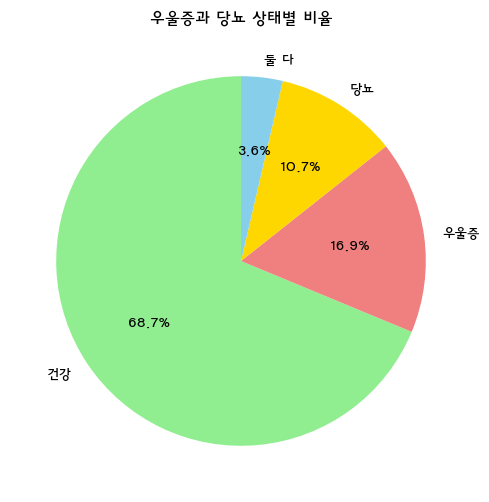

In [207]:
conditions = [
    (df['HadDepressiveDisorder'] == 'No') & (df['HadDiabetes'] == 'No'),
    (df['HadDepressiveDisorder'] == 'Yes') & (df['HadDiabetes'] == 'No'),
    (df['HadDepressiveDisorder'] == 'No') & (df['HadDiabetes'] == 'Yes'),
    (df['HadDepressiveDisorder'] == 'Yes') & (df['HadDiabetes'] == 'Yes')
]
labels = ['건강', '우울증', '당뇨', '둘 다']
counts = [df[i].shape[0] for i in conditions]


plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'gold', 'skyblue']
)
plt.title('우울증과 당뇨 상태별 비율')
plt.show()

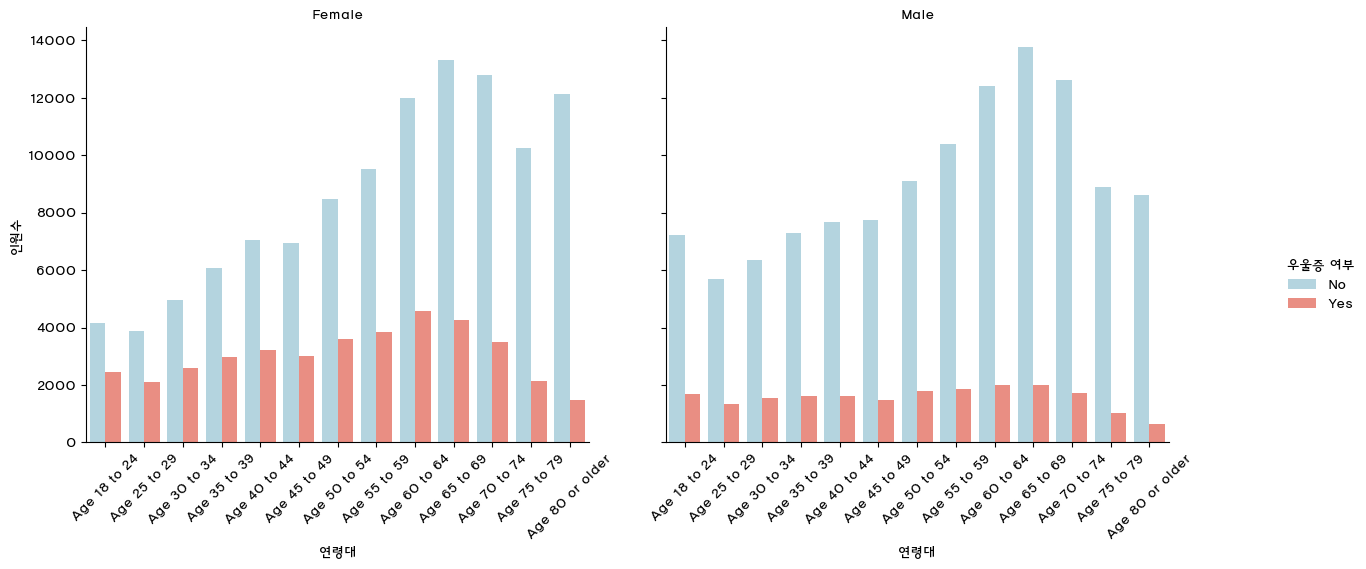

In [208]:
# FacetGrid로 성별에 따라 나누기
g = sns.catplot(
    data=df,
    x='AgeCategory',
    hue='HadDepressiveDisorder',
    col='Sex',
    kind='count',
    order=order,
    palette=['lightblue','salmon'],
    height=5,
    aspect=1.2
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("연령대", "인원수")
g.set_titles("{col_name}")
g._legend.set_title("우울증 여부")

plt.show()

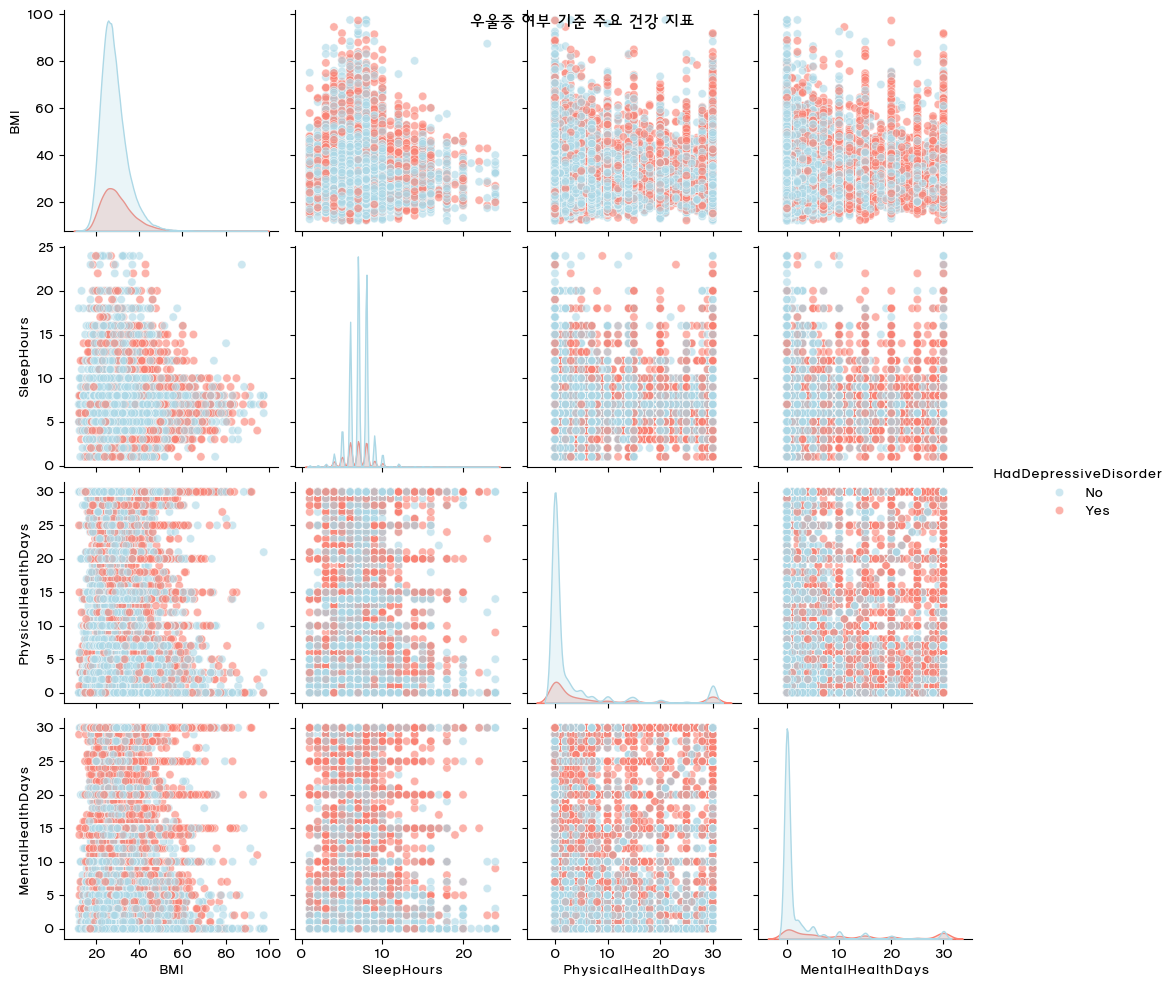

In [13]:
cols = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays', 'HadDepressiveDisorder']

# pairplot 생성
sns.pairplot(
    df[cols],
    hue='HadDepressiveDisorder',      # 우울증 여부에 따라 색 구분
    palette={'Yes':'salmon','No':'lightblue'},
    diag_kind='kde',                   # 대각선에 밀도곡선
    plot_kws={'alpha':0.6}             # 점 투명도
)

plt.suptitle('우울증 여부 기준 주요 건강 지표')
plt.show()

Text(0.5, 0.98, '당뇨환자 BMI 밀도 ( + 음주, 흡연)')

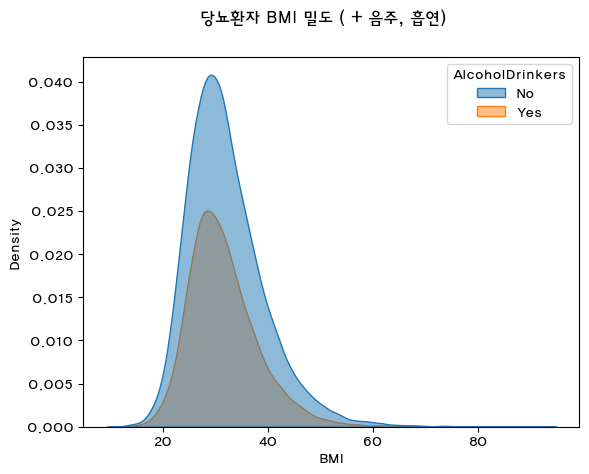

In [14]:
sns.kdeplot(
    data=df[df['HadDiabetes']=='Yes'],
    x='BMI',
    hue='AlcoholDrinkers',
    fill=True,
    alpha=0.5
)
plt.suptitle('당뇨환자 BMI 밀도 ( + 음주, 흡연)')



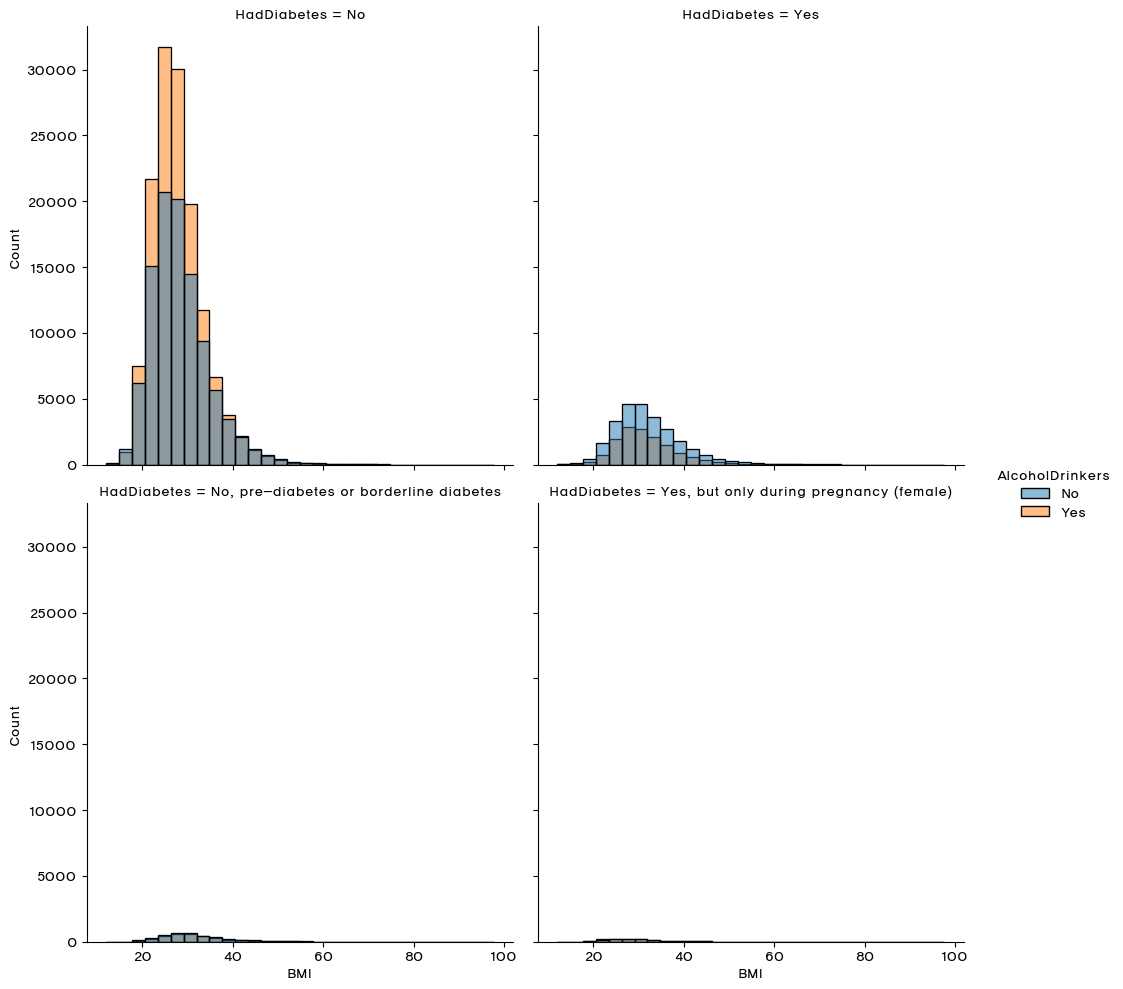

In [21]:
sns.displot(
    df,
    x='BMI',
    col='HadDiabetes',
    hue='AlcoholDrinkers',
    kind='hist',
    bins=30,
    alpha=0.5,
    col_wrap=2
)

In [22]:
df['SmokerStatus']
df['ECigaretteUsage'].unique()

df.loc[:,'ECigaretteUsage'] = df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': '비흡연',
    'Not at all (right now)': '과거흡연',
    'Use them some days': '가끔흡연',
    'Use them every day': '매일흡연'
})
df['ECigaretteUsage'].unique()

array(['비흡연', '과거흡연', '매일흡연', '가끔흡연'], dtype=object)

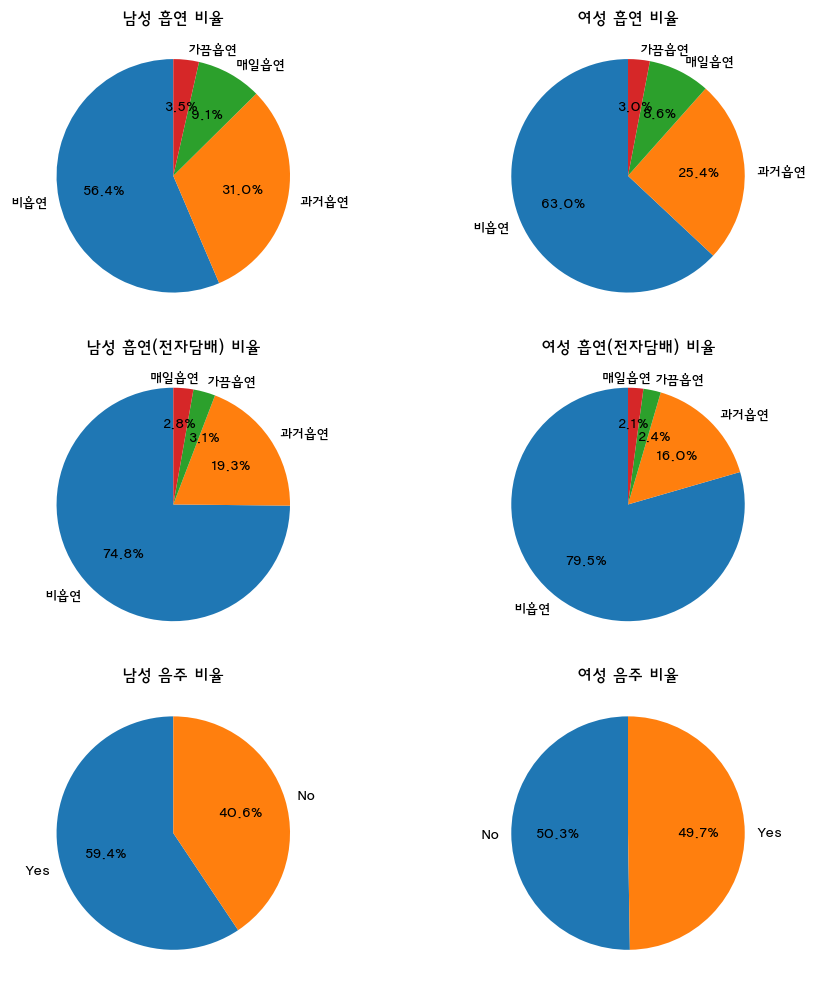

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))

smoke_male = male_df['SmokerStatus'].value_counts(normalize=True)
ax[0,0].pie(
    smoke_male,
    labels=smoke_male.index,
    autopct='%1.1f%%',
    startangle=90,

)

ax[0,0].set_title('남성 흡연 비율')


smoke_female = female_df['SmokerStatus'].value_counts(normalize=True)
ax[0,1].pie(
    smoke_female,
    labels=smoke_female.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,1].set_title('여성 흡연 비율')



ec_male = male_df['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts  = ax[1,0].pie(
    ec_male,
    labels=ec_male.index,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1  # 라벨 위치
)
for t in texts:
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))
ax[1,0].set_title('남성 흡연(전자담배) 비율')


ec_female = female_df['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts = ax[1,1].pie(
    ec_female,
    labels=ec_female.index,
    autopct='%1.1f%%',
    startangle=90
)
for t in texts:
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))
        
ax[1,1].set_title('여성 흡연(전자담배) 비율')


drink_male = male_df['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,0].pie(
    drink_male,
    labels=drink_male.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[2,0].set_title('남성 음주 비율')

drink_female = female_df['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,1].pie(
    drink_female,
    labels=drink_female.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[2,1].set_title('여성 음주 비율')

plt.tight_layout()
plt.show()

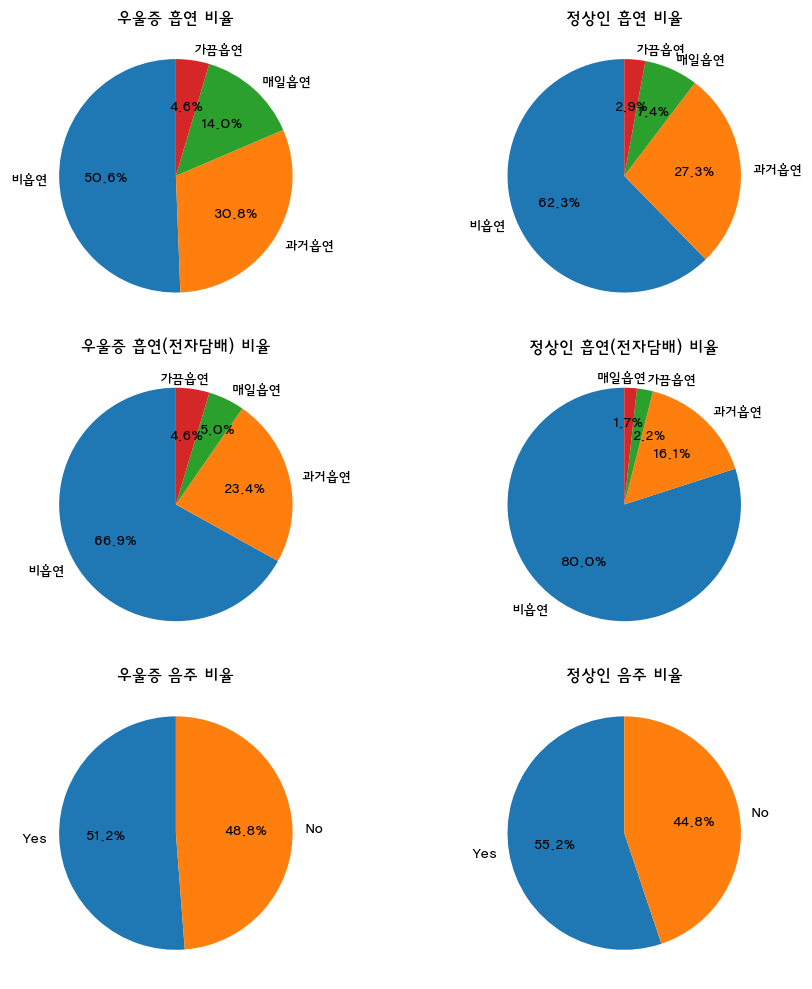

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))

# 우울증 있음 그룹
smoke_yes = df[df['HadDepressiveDisorder'] == 'Yes']['SmokerStatus'].value_counts(normalize=True)
ax[0,0].pie(
    smoke_yes,
    labels=smoke_yes.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,0].set_title('우울증 흡연 비율')


# 우울증 없음 그룹
smoke_no = df[df['HadDepressiveDisorder'] == 'No']['SmokerStatus'].value_counts(normalize=True)
ax[0,1].pie(
    smoke_no,
    labels=smoke_no.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[0,1].set_title('정상인 흡연 비율')


# 전자담배 (우울증 있음)
ec_yes = df[df['HadDepressiveDisorder'] == 'Yes']['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts = ax[1,0].pie(
    ec_yes,
    labels=ec_yes.index,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1
)
for t in texts:
    if t.get_text() == '가끔흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x+0.1, y + 0.1))
ax[1,0].set_title('우울증 흡연(전자담배) 비율')


# 전자담배 (우울증 없음)
ec_no = df[df['HadDepressiveDisorder'] == 'No']['ECigaretteUsage'].value_counts(normalize=True)
_, texts, autotexts = ax[1,1].pie(
    ec_no,
    labels=ec_no.index,
    autopct='%1.1f%%',
    startangle=90,
)
for t in texts:
    if t.get_text() == '매일흡연':
        x, y = t.get_position()
        t.set_position((x - 0.3, y))
for t, at in zip(texts, autotexts):
    if t.get_text() == '매일흡연':
        x, y = at.get_position()
        at.set_position((x, y + 0.1))
    if t.get_text() == '가끔흡연':
        x, y = at.get_position()
        at.set_position((x + 0.1, y))
ax[1,1].set_title('정상인 흡연(전자담배) 비율')


# 음주 (우울증 있음)
drink_yes = df[df['HadDepressiveDisorder'] == 'Yes']['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,0].pie(
    drink_yes,
    labels=drink_yes.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[2,0].set_title('우울증 음주 비율')


# 음주 (우울증 없음)
drink_no = df[df['HadDepressiveDisorder'] == 'No']['AlcoholDrinkers'].value_counts(normalize=True)
ax[2,1].pie(
    drink_no,
    labels=drink_no.index,
    autopct='%1.1f%%',
    startangle=90,
)
ax[2,1].set_title('정상인 음주 비율')


plt.tight_layout()
plt.show()

In [ ]:
display(df['CovidPos'].unique())
display(df['HadDiabetes'].unique())

array(['No', 'Yes',
       'Tested positive using home test without a health professional'],
      dtype=object)

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but only during pregnancy (female)'], dtype=object)

In [25]:
df.loc[:, 'CovidPos'] = df['CovidPos'].replace({
    'Tested positive using home test without a health professional': 'Yes'
})

df.loc[:, 'HadDiabetes'] = df['HadDiabetes'].replace({
    'Yes, but only during pregnancy (female)': 'No',
    'No, pre-diabetes or borderline diabetes': 'Pre-diabetes'
})

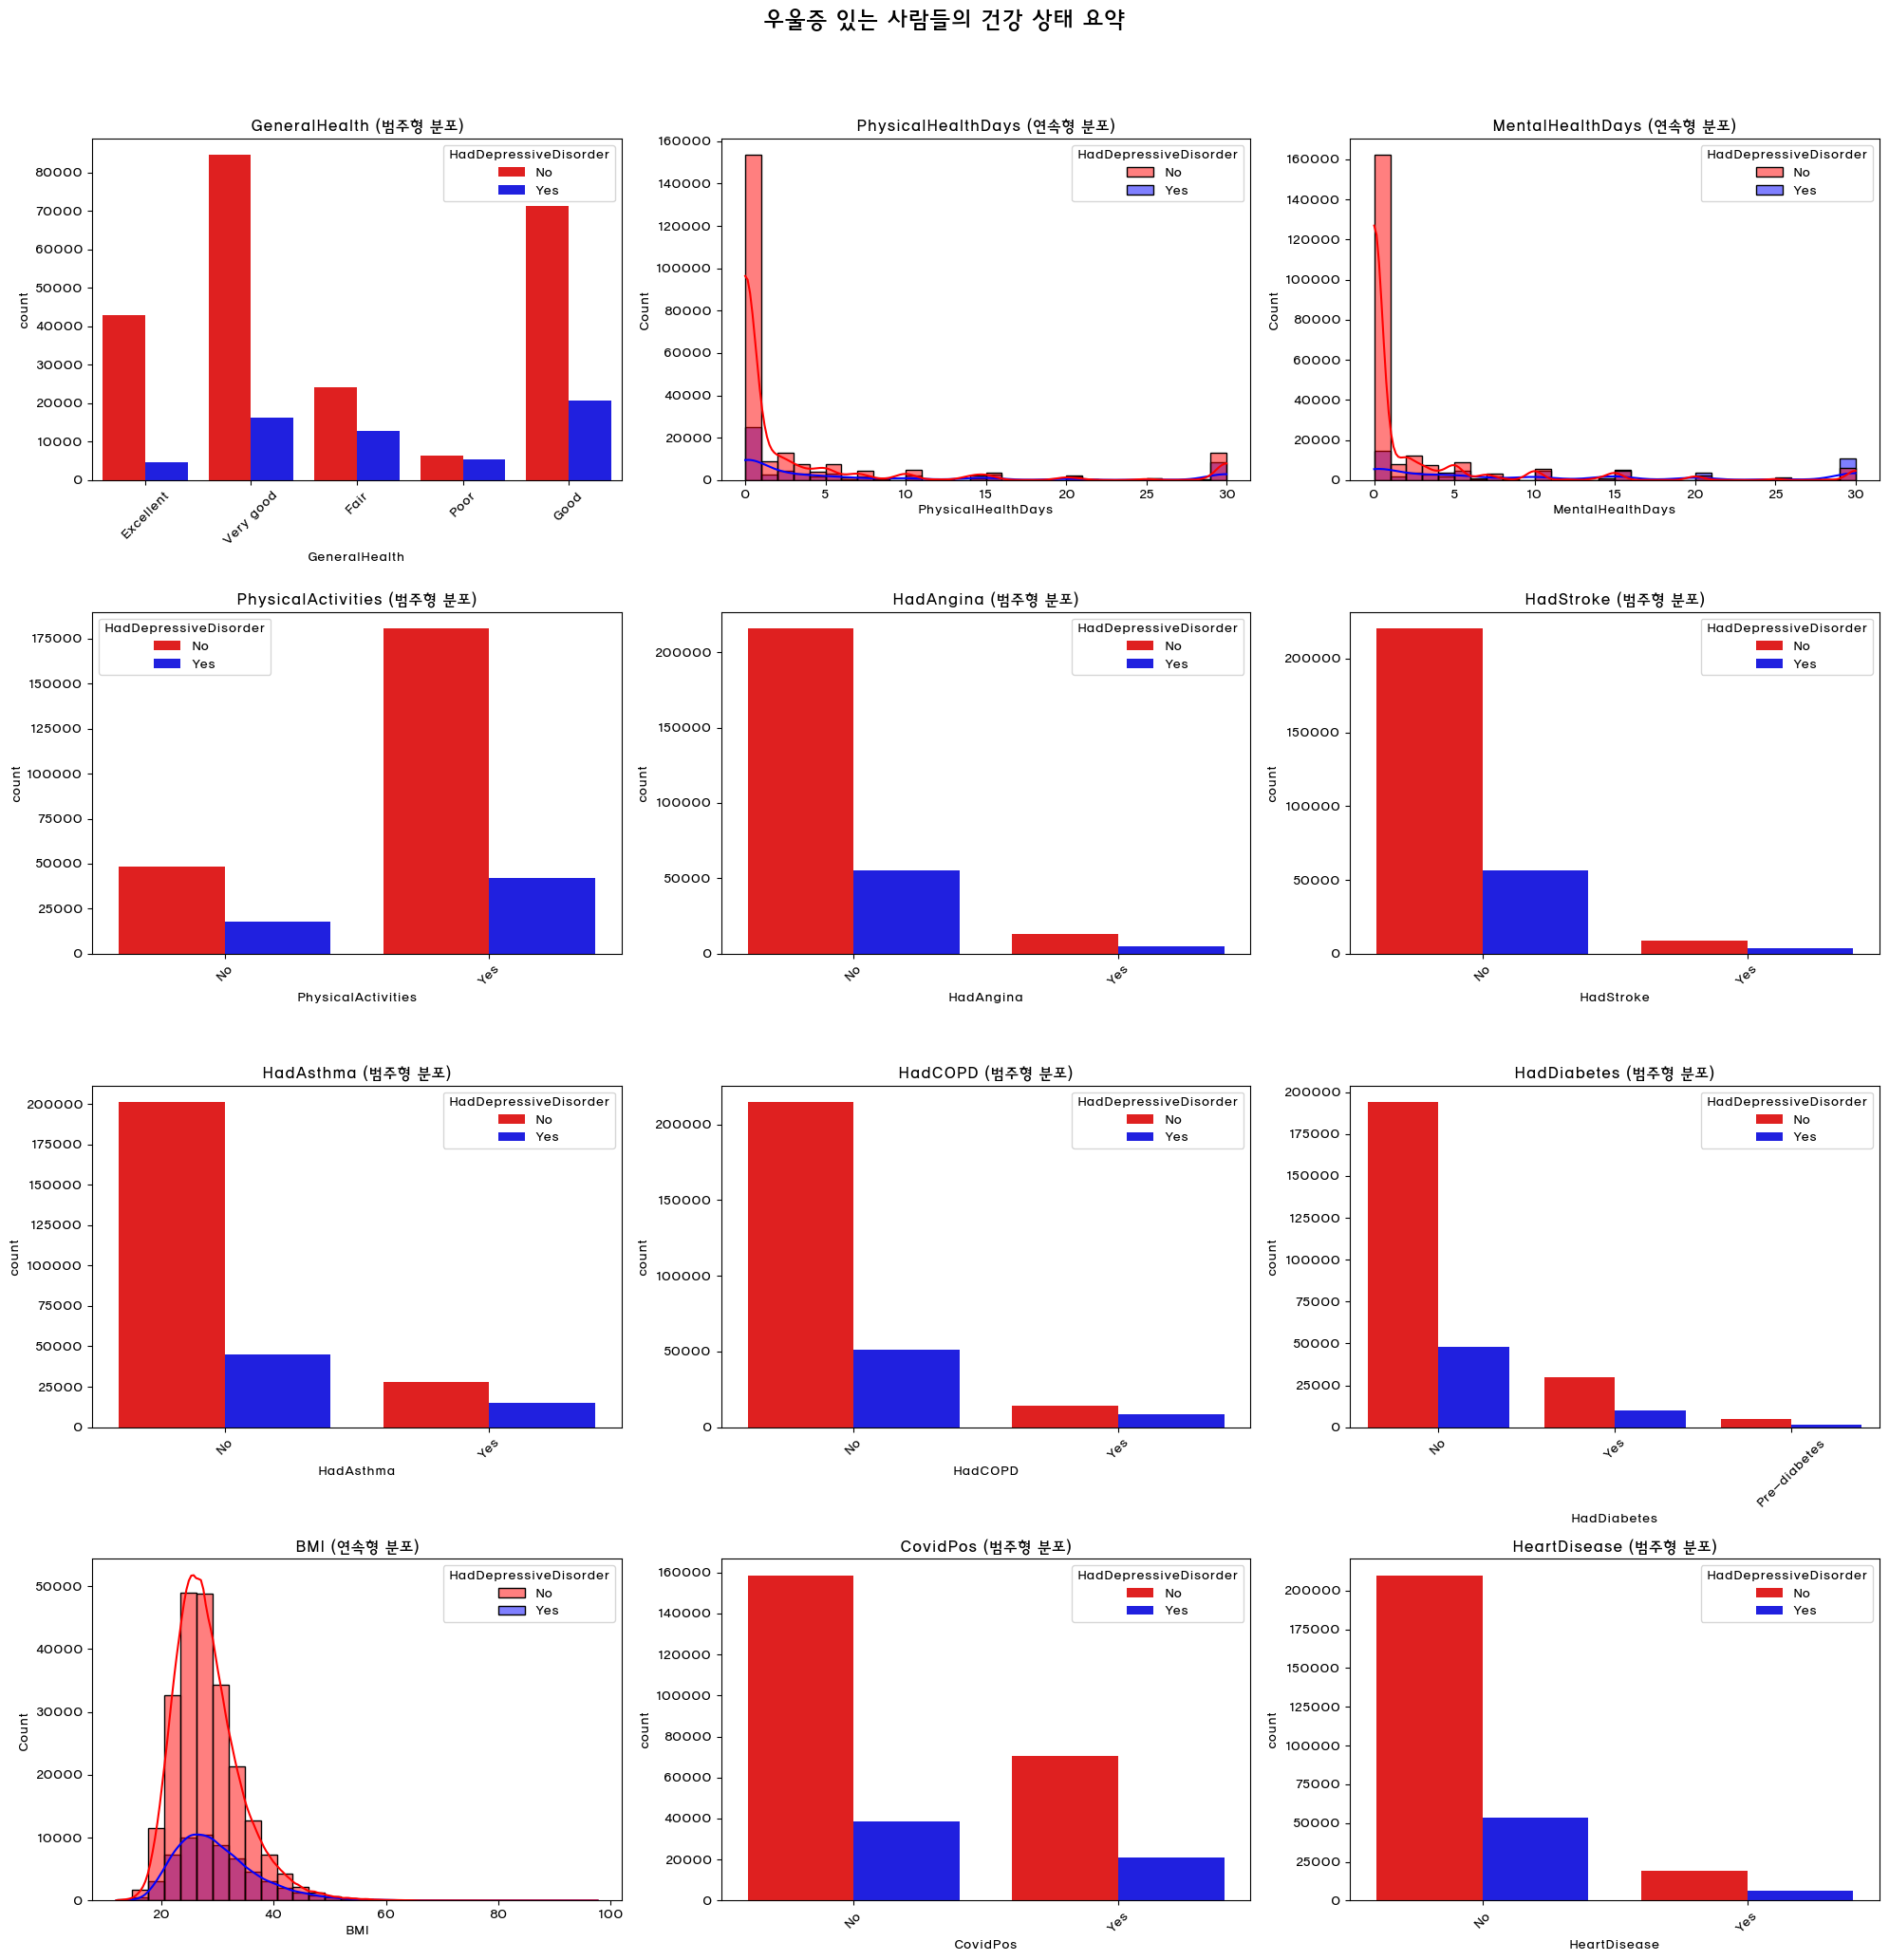

In [26]:
depress_df = df[df['HadDepressiveDisorder'] == 'Yes']

cols = [
    'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 
    'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 
    'HadCOPD', 'HadDiabetes', 'BMI', 'CovidPos', 'HeartDisease'
]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(data=df, x=col, bins=30, kde=True, hue='HadDepressiveDisorder', ax=ax, palette=['red','blue'])
        ax.set_title(f"{col} (연속형 분포)")
    
    else:
        sns.countplot(data=df, x=col, hue='HadDepressiveDisorder', palette=['red','blue'], ax=ax)
        ax.set_title(f"{col} (범주형 분포)")
        ax.tick_params(axis='x', rotation=45)



plt.suptitle("우울증 있는 사람들의 건강 상태 요약",fontsize=18, y=1.03)
plt.tight_layout()

plt.show()

딱히 우울증이 있다고 병에 잘 걸리지는 않지만,
 건강이 나쁠수록 우울증의 비율이 높아진다?? 일반인과 우울증인의 비율이 비슷해진?


C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\3437062767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


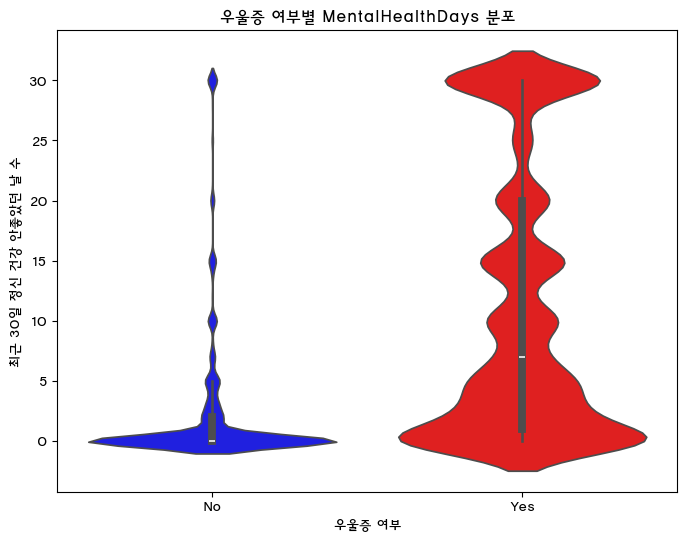

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x='HadDepressiveDisorder',
    y='MentalHealthDays',
    palette=['blue','red']
)
plt.title('우울증 여부별 MentalHealthDays 분포')
plt.xlabel('우울증 여부')
plt.ylabel('최근 30일 정신 건강 안좋았던 날 수')
plt.show()


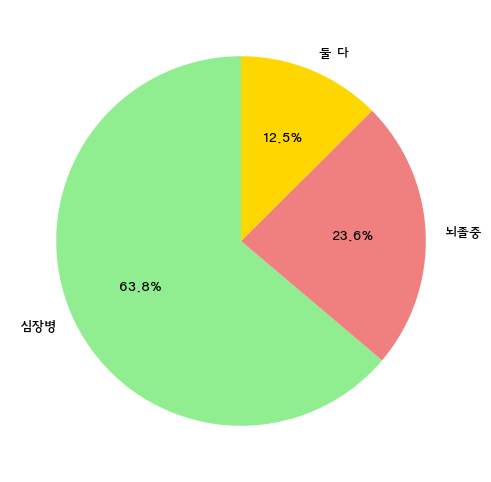

In [28]:
conditions = [

    (df['HeartDisease'] == 'Yes') & (df['HadStroke'] == 'No'),
    (df['HeartDisease'] == 'No') & (df['HadStroke'] == 'Yes'),
    (df['HeartDisease'] == 'Yes') & (df['HadStroke'] == 'Yes')
]
labels = ['심장병', '뇌졸중', '둘 다']
counts = [df[i].shape[0] for i in conditions]


plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'gold', 'skyblue']
)
plt.show()

심장병 있음 -> 뇌졸중 확률: 16.43%
심장병 없음 -> 뇌졸중 확률: 3.04%


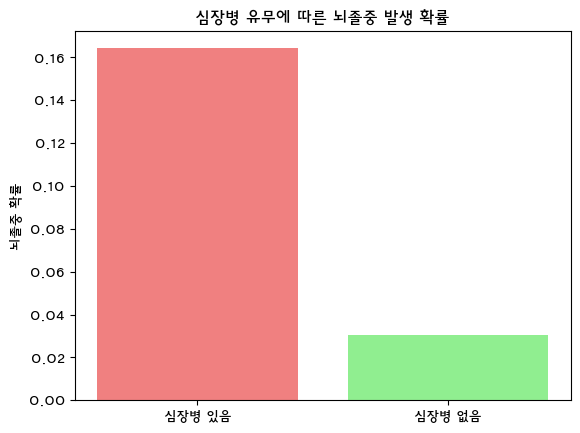

In [29]:
# 심장병이 있는 사람 중 뇌졸중 비율
hd_yes = df[df['HeartDisease']=='Yes']
stroke_given_hd_yes = (hd_yes['HadStroke']=='Yes').mean()

# 심장병이 없는 사람 중 뇌졸중 비율
hd_no = df[df['HeartDisease']=='No']
stroke_given_hd_no = (hd_no['HadStroke']=='Yes').mean()

print(f"심장병 있음 -> 뇌졸중 확률: {stroke_given_hd_yes:.2%}")
print(f"심장병 없음 -> 뇌졸중 확률: {stroke_given_hd_no:.2%}")
plt.bar(['심장병 있음','심장병 없음'], [stroke_given_hd_yes, stroke_given_hd_no], color=['lightcoral','lightgreen'])
plt.ylabel('뇌졸중 확률')
plt.title('심장병 유무에 따른 뇌졸중 발생 확률')
plt.show()

In [ ]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

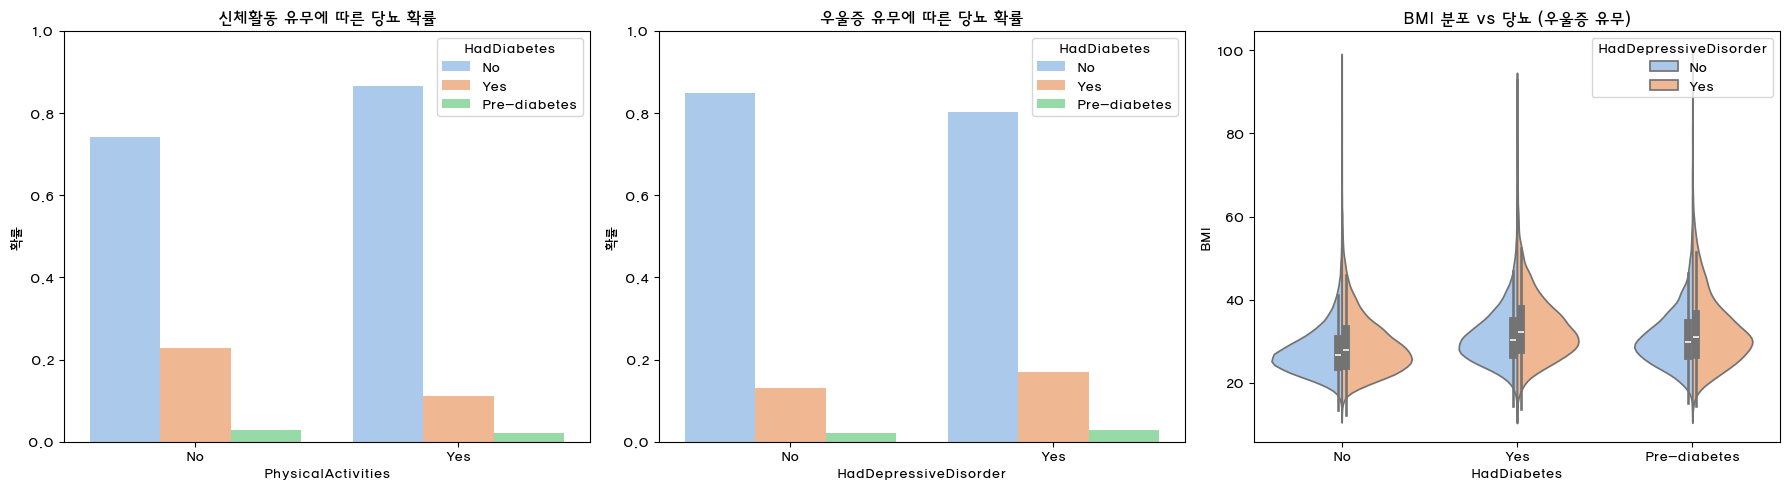

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1️⃣ 신체활동 유무 vs 당뇨 유무 (확률)
pa_diabetes = df.groupby('PhysicalActivities')['HadDiabetes'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(
    data=pa_diabetes,
    x='PhysicalActivities',
    y='proportion',
    hue='HadDiabetes',
    palette='pastel',
    ax=axes[0]
)
axes[0].set_title('신체활동 유무에 따른 당뇨 확률')
axes[0].set_ylabel('확률')
axes[0].set_ylim(0,1)

# 2️⃣ 우울증 유무 vs 당뇨 유무 (확률)
dep_diabetes = df.groupby('HadDepressiveDisorder')['HadDiabetes'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(
    data=dep_diabetes,
    x='HadDepressiveDisorder',
    y='proportion',
    hue='HadDiabetes',
    palette='pastel',
    ax=axes[1]
)
axes[1].set_title('우울증 유무에 따른 당뇨 확률')
axes[1].set_ylabel('확률')
axes[1].set_ylim(0,1)

# 3️⃣ BMI vs 당뇨 유무 (우울증 기준 확률, boxplot 그대로는 비율 안되므로 violinplot 권장)
sns.violinplot(
    data=df,
    x='HadDiabetes',
    y='BMI',
    hue='HadDepressiveDisorder',
    split=True,
    palette='pastel',
    ax=axes[2]
)
axes[2].set_title('BMI 분포 vs 당뇨 (우울증 유무)')
axes[2].set_ylabel('BMI')

plt.tight_layout()
plt.show()


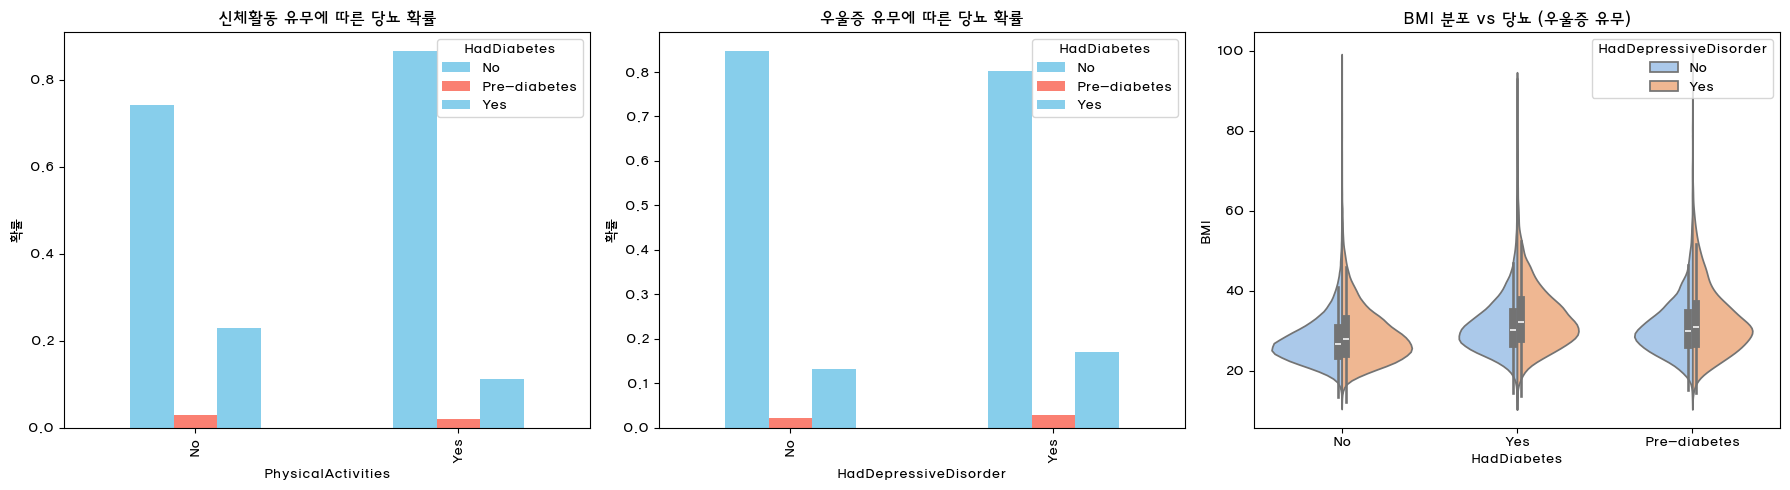

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1️⃣ 신체활동 유무 vs 당뇨 확률
pa_diabetes_prob = df.groupby('PhysicalActivities')['HadDiabetes'].value_counts(normalize=True).unstack()
pa_diabetes_prob.plot(kind='bar', stacked=False, ax=axes[0], color=['skyblue','salmon'])
axes[0].set_title('신체활동 유무에 따른 당뇨 확률')
axes[0].set_ylabel('확률')
axes[0].set_xlabel('PhysicalActivities')
axes[0].legend(title='HadDiabetes')

# 2️⃣ 우울증 유무 vs 당뇨 확률
dep_diabetes_prob = df.groupby('HadDepressiveDisorder')['HadDiabetes'].value_counts(normalize=True).unstack()
dep_diabetes_prob.plot(kind='bar', stacked=False, ax=axes[1], color=['skyblue','salmon'])
axes[1].set_title('우울증 유무에 따른 당뇨 확률')
axes[1].set_ylabel('확률')
axes[1].set_xlabel('HadDepressiveDisorder')
axes[1].legend(title='HadDiabetes')

# 3️⃣ BMI vs 당뇨 확률 (boxplot 대신 violinplot으로 분포 확인)
sns.violinplot(
    data=df,
    x='HadDiabetes',
    y='BMI',
    hue='HadDepressiveDisorder',
    split=True,
    palette='pastel',
    ax=axes[2]
)
axes[2].set_title('BMI 분포 vs 당뇨 (우울증 유무)')
axes[2].set_ylabel('BMI')

plt.tight_layout()
plt.show()

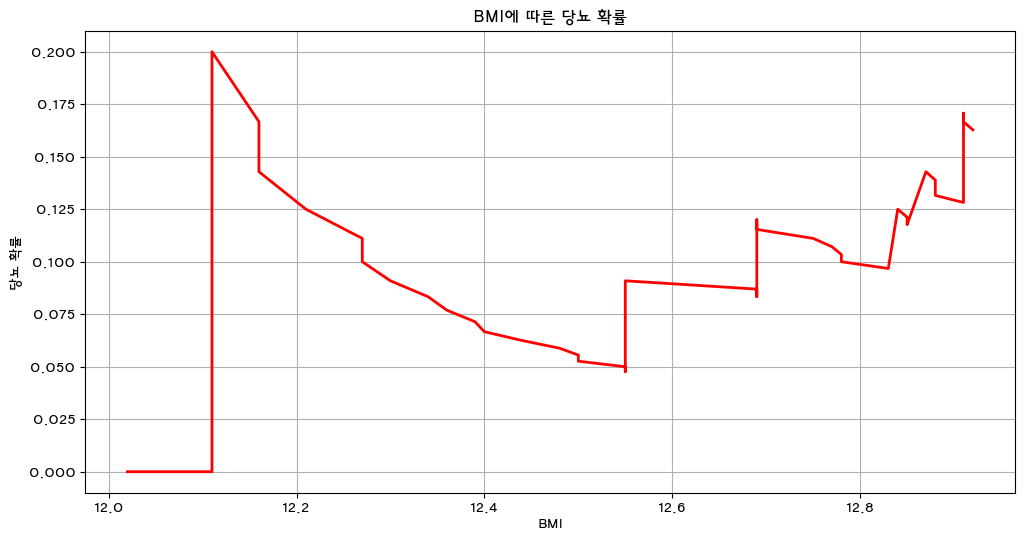

In [30]:
# BMI 정렬
df_sorted = df.sort_values('BMI')
bmi_sorted = df_sorted['BMI'].values
diabetes_sorted = df_sorted['HadDiabetes'].map({'Yes':1, 'No':0}).values

# BMI 기준으로 누적 평균 계산 → BMI 오름차순으로 확률 선 만들기
cumsum = np.cumsum(diabetes_sorted)
counts = np.arange(1, len(diabetes_sorted)+1)
prob = cumsum / counts

plt.figure(figsize=(12,6))
plt.plot(bmi_sorted, prob, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('당뇨 확률')
plt.title('BMI에 따른 당뇨 확률')
plt.grid(True)
plt.show()


In [184]:
# # HadDiabetes를 0/1로 변환
# df['HadDiabetes_num'] = df['HadDiabetes'].map({'Yes':1, 'No':0})

# # BMI 순서대로 정렬
# df_sorted = df.sort_values('BMI')
# bmi_sorted = df_sorted['BMI'].values
# diabetes_sorted = df_sorted['HadDiabetes_num'].values

# # BMI마다 확률 계산
# # 같은 BMI가 여러 개 있으면 평균 확률
# unique_bmi = np.unique(bmi_sorted)
# prob = [diabetes_sorted[bmi_sorted==b].mean() for b in unique_bmi]

# plt.figure(figsize=(12,6))
# plt.plot(unique_bmi, prob, color='red', linewidth=2)
# plt.xlabel('BMI')
# plt.ylabel('당뇨 있을 확률')
# plt.title('BMI에 따른 당뇨 확률 (표본 전체 반영)')
# plt.grid(True)
# plt.show()

In [185]:
# df[df['SleepHours'] >= 23.0]
# df = df[df['SleepHours'] > 20.0] 


# df[['Sex', 'GeneralHealth', 'PhysicalHealthDays','MentalHealthDays','SleepHours','AgeCategory','HeartDisease']]


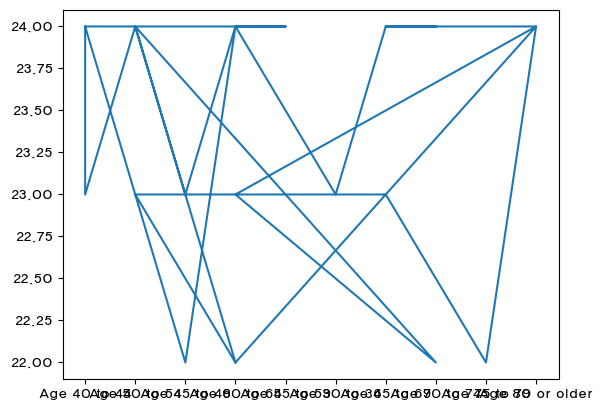

In [ ]:
# plt.plot(
#     df['AgeCategory'],df['SleepHours']
# )

C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\535140127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_bin'] = pd.cut(bmi, bins=bins)
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\535140127.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').mean())


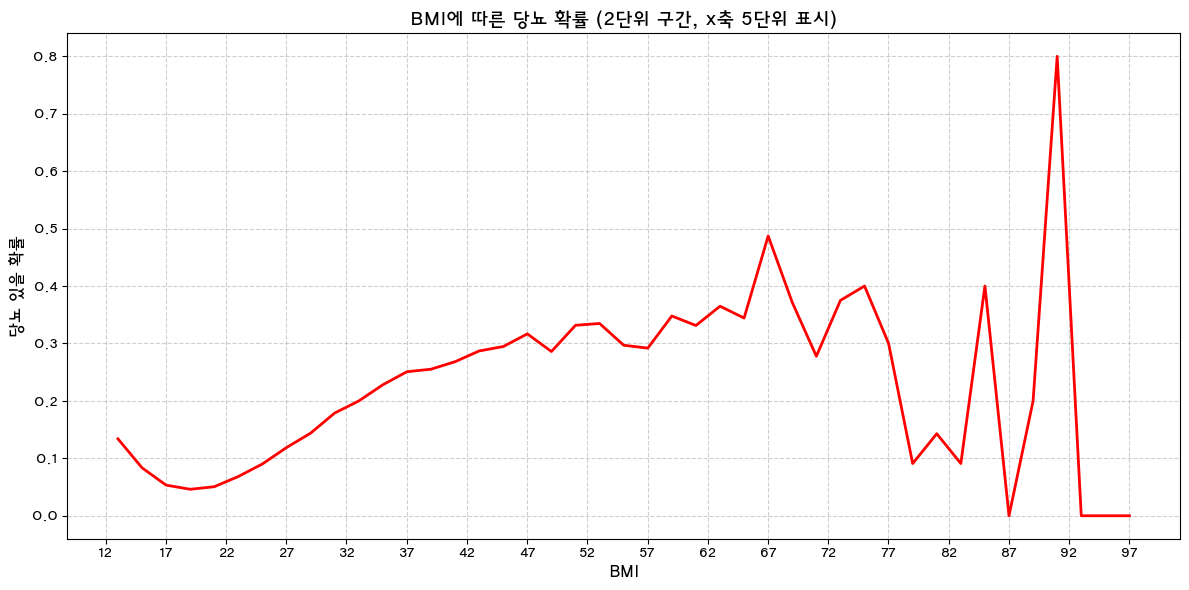

In [31]:
# BMI와 당뇨 여부 데이터 준비
bmi = df['BMI']
diabetes = (df['HadDiabetes'] == 'Yes').astype(int)

# BMI를 2단위로 binning
bins = np.arange(bmi.min(), bmi.max() + 2, 2)
df['BMI_bin'] = pd.cut(bmi, bins=bins)

# 각 구간별 당뇨 확률 계산
bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').mean())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in bmi_grouped.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, bmi_grouped.values, color='red', linewidth=2)

# 제목, 라벨
plt.title("BMI에 따른 당뇨 확률 (2단위 구간, x축 5단위 표시)", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("당뇨 있을 확률", fontsize=12)

# x축 5단위 간격으로
plt.xticks(np.arange(int(bmi.min()), int(bmi.max()) + 1, 5))

# 격자 추가 (가로, 세로 둘 다)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\587390147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_bin'] = pd.cut(bmi, bins=bins)
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\587390147.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())


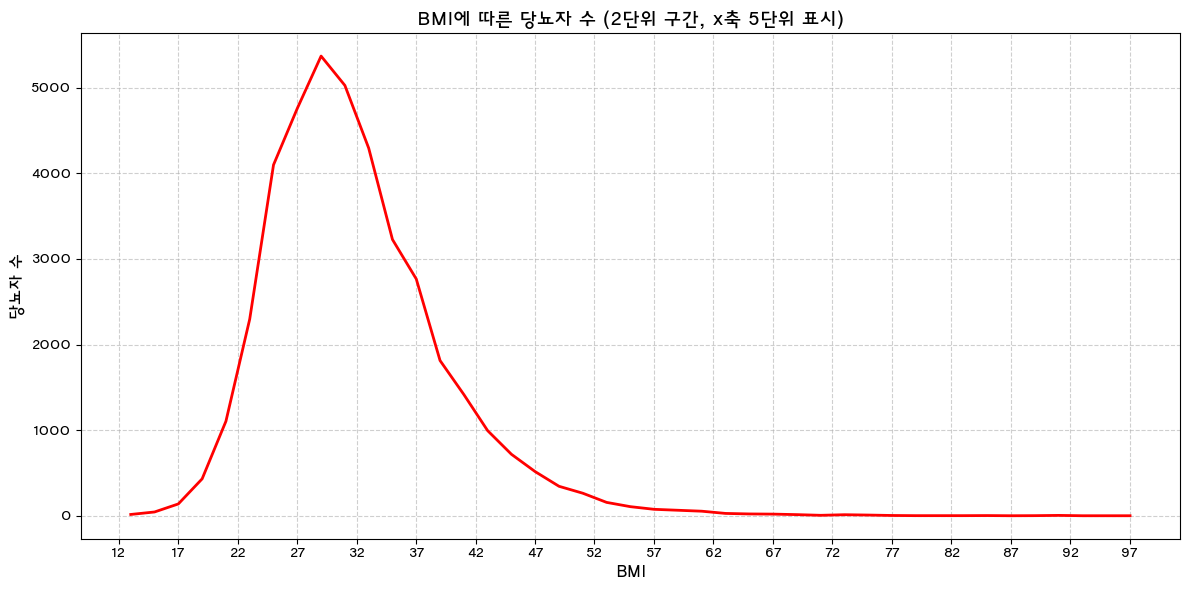

In [32]:

# BMI와 당뇨 여부 데이터
bmi = df['BMI']
bins = np.arange(bmi.min(), bmi.max() + 2, 2)
df['BMI_bin'] = pd.cut(bmi, bins=bins)

# 각 구간별 당뇨자 수(count)
bmi_grouped = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in bmi_grouped.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, bmi_grouped.values, color='red', linewidth=2)

# 제목, 라벨
plt.title("BMI에 따른 당뇨자 수 (2단위 구간, x축 5단위 표시)", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("당뇨자 수", fontsize=12)

# x축 5단위 간격으로
plt.xticks(np.arange(int(bmi.min()), int(bmi.max()) + 1, 5))

# 격자 추가
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_bin'] = pd.cut(df['BMI'], bins=bins)
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_yes = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())
C:\Users\TJ\AppData\Local\Temp\ipykernel_12472\662216096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

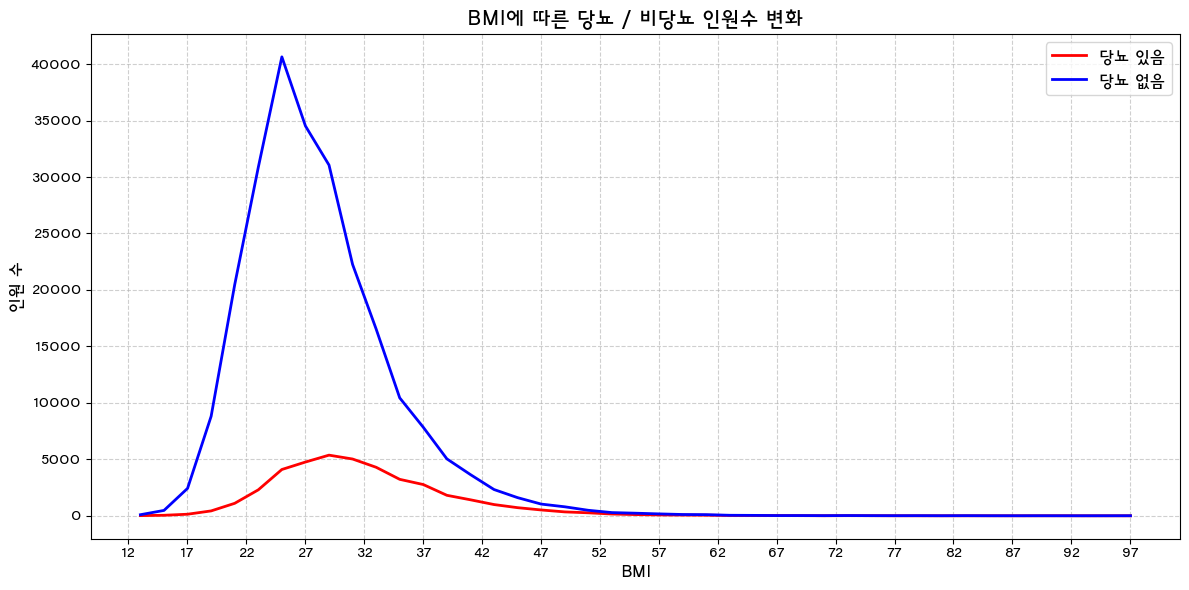

In [33]:
# BMI 구간 생성 (2 단위 간격)
bins = np.arange(df['BMI'].min(), df['BMI'].max() + 2, 2)
df['BMI_bin'] = pd.cut(df['BMI'], bins=bins)

# 구간별 당뇨자 수 / 비당뇨자 수
diabetes_yes = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'Yes').sum())
diabetes_no = df.groupby('BMI_bin')['HadDiabetes'].apply(lambda x: (x == 'No').sum())

# 구간 중심값 계산
bin_centers = [interval.mid for interval in diabetes_yes.index.categories]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(bin_centers, diabetes_yes.values, color='red', linewidth=2, label='당뇨 있음')
plt.plot(bin_centers, diabetes_no.values, color='blue', linewidth=2, label='당뇨 없음')

# 제목, 라벨
plt.title("BMI에 따른 당뇨 / 비당뇨 인원수 변화", fontsize=15)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("인원 수", fontsize=12)

# x축 5단위 간격 눈금
plt.xticks(np.arange(int(df['BMI'].min()), int(df['BMI'].max()) + 1, 5))

# 격자 및 범례
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()